In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import finance_utils as fu
import ystockquote as ysq
import technical_indicators as ti
import stock_db_mgr as sdm

In [2]:
np.__version__

'1.19.5'

In [3]:
pd.__version__

'1.1.5'

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]

# Numpy Test

In [5]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
1

1

In [7]:
1 + _

2

# Pandas Test

<AxesSubplot:>

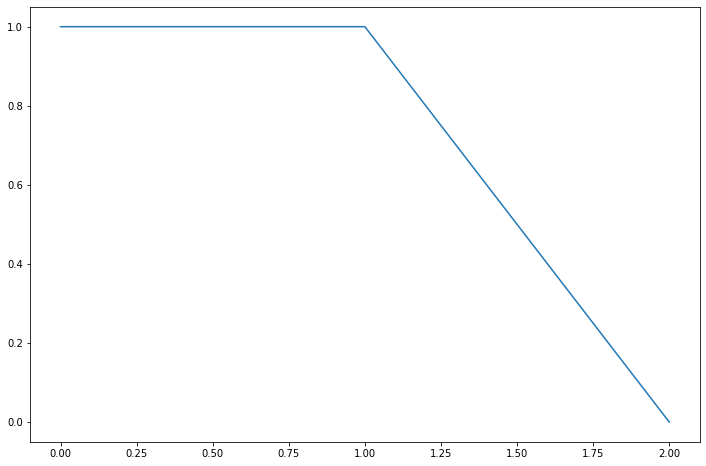

In [8]:
# True/False plotting:
(pd.Series(['apple', 'apple', 'banana']) == 'apple').mul(1).plot()

# Technical Indicator Tests

In [9]:
# stop is excluded
t = np.arange(-5, 6, 1)
t

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [10]:
s = ti.step(t)
s

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [11]:
r = ti.ramp(t)
r

array([-0., -0., -0., -0., -0.,  0.,  1.,  2.,  3.,  4.,  5.])

<StemContainer object of 3 artists>

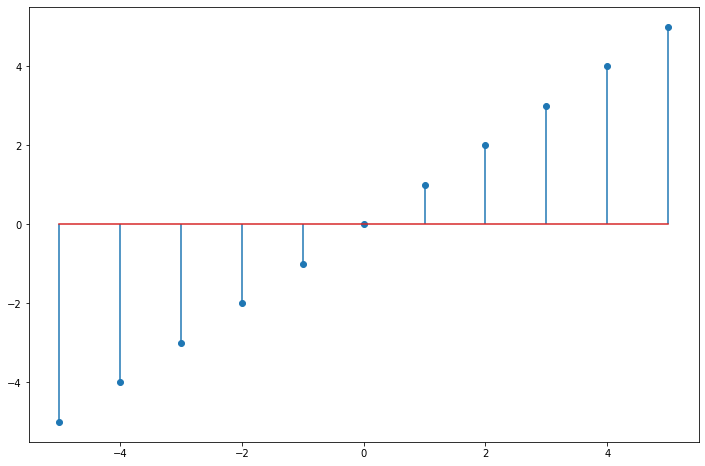

In [12]:
plt.stem(t, t)

<StemContainer object of 3 artists>

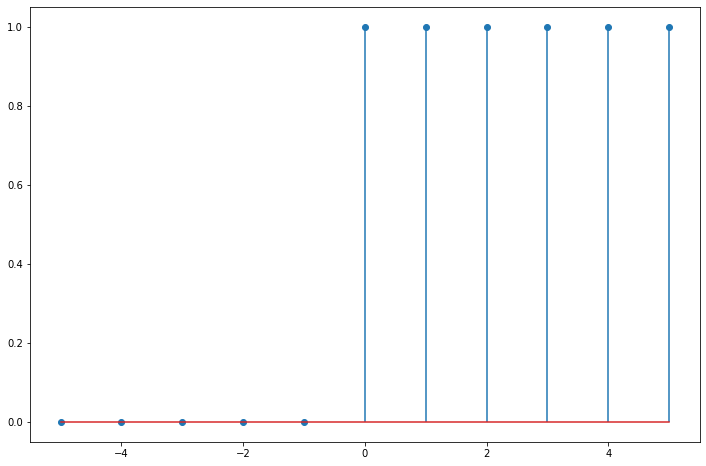

In [13]:
plt.stem(t, s)

<StemContainer object of 3 artists>

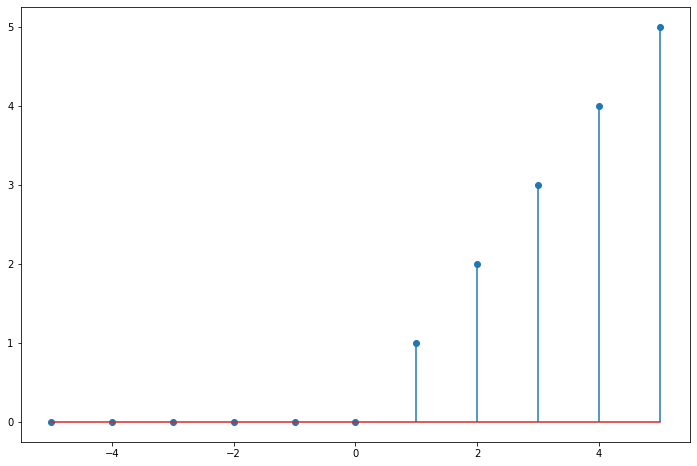

In [14]:
plt.stem(t, r)

# Finance Utils

In [15]:
fu.calc_commission(34)

5.069

In [16]:
fu.calc_commission_etf(34)

0.11900000000000001

# Yahoo Test

In [17]:
s = 'XBB.TO'
ysq.get_52_week_high(s)

32.4

In [18]:
ysq.get_52_week_low(s)

29.98

In [19]:
ysq.get_price(s)

30.44

In [20]:
# TBD: bug in some ETF dividend
#ysq.get_dividend_yield('ZCN.TO')

In [21]:
#ysq.get_dividend_yield('VUN.TO')

# Stock DB Manager

In [22]:
db = sdm.StockDBMgr('stock_db/qt')

In [23]:
sym_list = db.get_all_symbols()
sym_list

['VUN.TO', 'XBB.TO', 'XEC.TO', 'XEF.TO', 'ZCN.TO']

In [24]:
for s in sym_list:
    print(db.validate_symbol_data('VUN.TO'))

True
True
True
True
True


In [25]:
db.update_all_symbols()

Downloading:VUN.TO ...
Downloading:XBB.TO ...
Downloading:XEC.TO ...
Downloading:XEF.TO ...
Downloading:ZCN.TO ...


In [26]:
s = sym_list[0]
s

'VUN.TO'

In [27]:
df = db.get_symbol_data(s)
df.head()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851351,21.851351,21.833551,21.851351,7300.0
2013-08-13,21.993765,22.002666,21.940362,22.002666,2100.0
2013-08-14,21.958160,21.958160,21.851350,21.869152,6300.0
2013-08-15,21.717832,21.717832,21.486412,21.486412,8400.0
2013-08-16,21.539818,21.602123,21.459712,21.486412,5400.0


In [28]:
df.tail()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2022-02-24,71.779999,75.370003,71.769997,75.370003,81200.0
2022-02-25,75.309998,76.529999,75.139999,76.339996,52100.0
2022-02-28,75.849998,76.379997,75.330002,76.150002,39100.0
2022-03-01,76.150002,77.760002,74.940002,75.400002,44300.0
2022-03-02,75.400002,76.419998,75.260002,76.129997,45500.0


<AxesSubplot:xlabel='Date'>

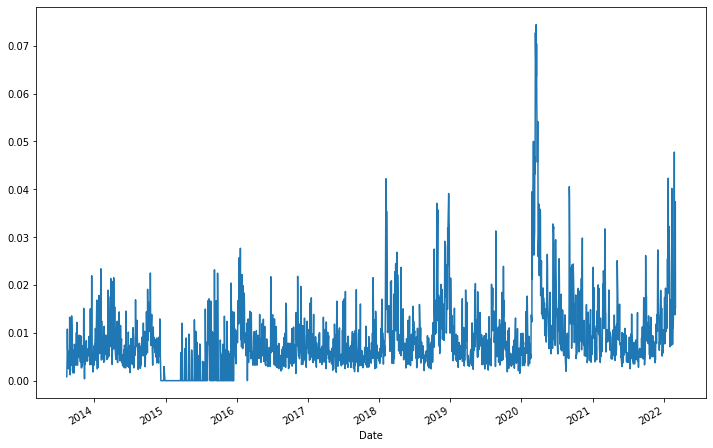

In [29]:
((df['High'] - df['Low']) / df['Close']).plot()

In [30]:
dfa = db.get_all_symbol_single_data_item('Close')
dfa.describe()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2147.000000,5341.000000,2229.000000,2229.000000,2959.000000
mean,45.879789,22.096309,22.545236,25.795954,17.304453
std,15.651003,5.815880,4.346064,4.862840,4.284808
min,21.361805,12.270428,14.700088,15.931484,11.006385
25%,33.902701,16.825228,18.541824,22.204733,13.449678
50%,43.549252,22.124441,22.754204,26.070873,16.687105
75%,54.098664,27.214491,25.517902,28.739168,19.852488
max,84.363998,32.746597,33.072247,36.347157,29.085384


In [31]:
dfa

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,NaN,12.700976,NaN,NaN,NaN
2000-11-24,NaN,12.677049,NaN,NaN,NaN
2000-11-27,NaN,12.677049,NaN,NaN,NaN
2000-11-28,NaN,12.748819,NaN,NaN,NaN
2000-11-29,NaN,12.772733,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-24,75.370003,30.040001,27.920000,32.900002,27.920000
2022-02-25,76.339996,30.150000,28.230000,33.410000,28.410000
2022-02-28,76.150002,30.320000,27.860001,32.880001,28.430000


<AxesSubplot:xlabel='Date'>

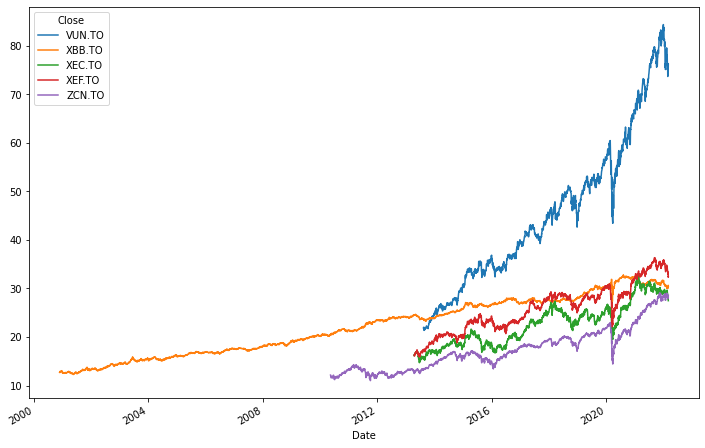

In [32]:
dfa.plot()

## N/A Testing

In [33]:
dfa.isna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,True,False,True,True,True
2000-11-24,True,False,True,True,True
2000-11-27,True,False,True,True,True
2000-11-28,True,False,True,True,True
2000-11-29,True,False,True,True,True
...,...,...,...,...,...
2022-02-24,False,False,False,False,False
2022-02-25,False,False,False,False,False
2022-02-28,False,False,False,False,False


In [34]:
# Logical NOT
~(dfa.isna())

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-02-24,True,True,True,True,True
2022-02-25,True,True,True,True,True
2022-02-28,True,True,True,True,True


In [35]:
dfa.notna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-02-24,True,True,True,True,True
2022-02-25,True,True,True,True,True
2022-02-28,True,True,True,True,True


In [36]:
# .mul(1) to convert bool to 0-1
dfa.isna().mul(1)

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,1,0,1,1,1
2000-11-24,1,0,1,1,1
2000-11-27,1,0,1,1,1
2000-11-28,1,0,1,1,1
2000-11-29,1,0,1,1,1
...,...,...,...,...,...
2022-02-24,0,0,0,0,0
2022-02-25,0,0,0,0,0
2022-02-28,0,0,0,0,0


In [37]:
dfa.isna().any()

Close
VUN.TO     True
XBB.TO    False
XEC.TO     True
XEF.TO     True
ZCN.TO     True
dtype: bool

In [38]:
dfa.isna().any(axis='columns').head()

Date
2000-11-23    True
2000-11-24    True
2000-11-27    True
2000-11-28    True
2000-11-29    True
dtype: bool

<AxesSubplot:xlabel='Date'>

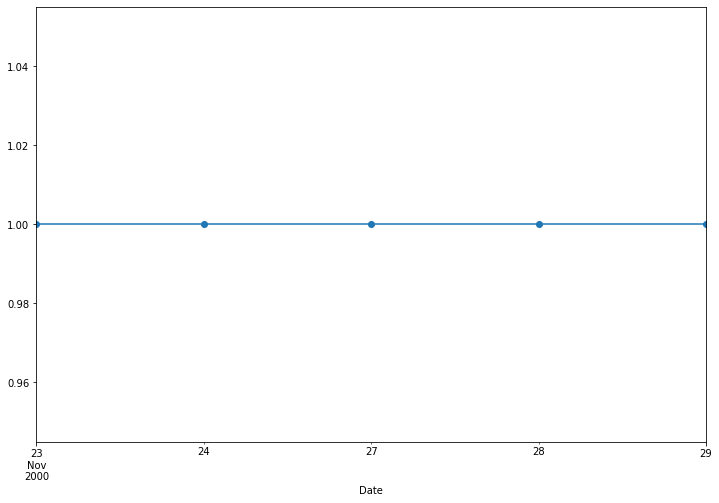

In [39]:
dfa.isna().head().any(1).mul(1).plot(marker='o')

<AxesSubplot:xlabel='Date'>

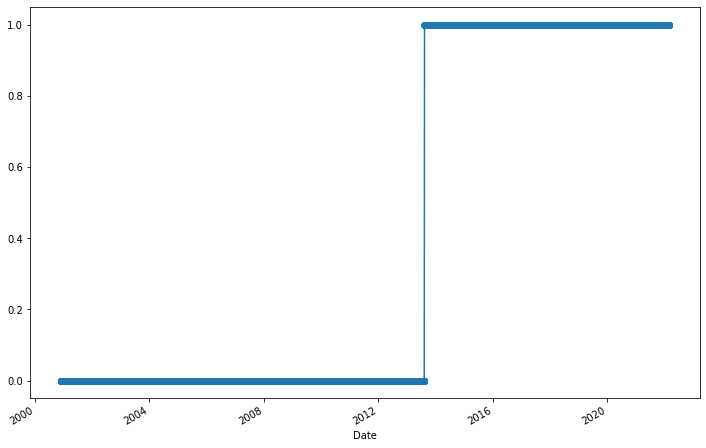

In [40]:
(~dfa.isna().any(1)).mul(1).plot(marker='o')

In [41]:
# Date when first all data available
dfa[(~dfa.isna().any(1))].iloc[0]

Close
VUN.TO    21.851351
XBB.TO    23.745426
XEC.TO    15.785608
XEF.TO    17.214563
ZCN.TO    13.304461
Name: 2013-08-12 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

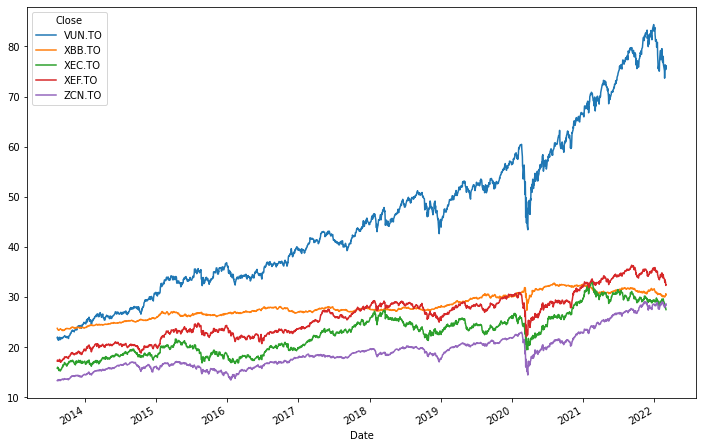

In [42]:
# Plot when data start to be valid for all stocks
dfa[(~dfa.isna().any(1))].plot()

In [43]:
# Could be drastic?
df.dropna(axis=1, how='any', inplace=False)

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851351,21.851351,21.833551,21.851351,7300.0
2013-08-13,21.993765,22.002666,21.940362,22.002666,2100.0
2013-08-14,21.958160,21.958160,21.851350,21.869152,6300.0
2013-08-15,21.717832,21.717832,21.486412,21.486412,8400.0
2013-08-16,21.539818,21.602123,21.459712,21.486412,5400.0
...,...,...,...,...,...
2022-02-24,71.779999,75.370003,71.769997,75.370003,81200.0
2022-02-25,75.309998,76.529999,75.139999,76.339996,52100.0
2022-02-28,75.849998,76.379997,75.330002,76.150002,39100.0


<AxesSubplot:xlabel='Date'>

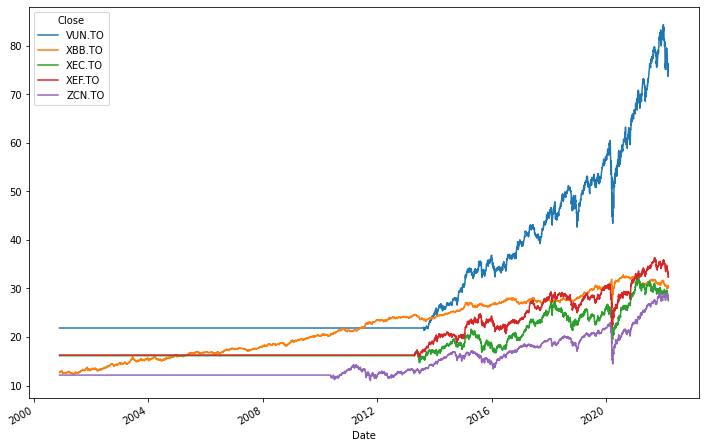

In [44]:
fu.fill_nan_data(dfa).plot()